In [14]:
import numpy as np
import biot_savart_v4_3 as bs
import matplotlib.pyplot as plt

In [15]:
# set the size larger
plt.rcParams["figure.figsize"] = (10, 10)

In [16]:
# COIL_NAME = "coil_6_spiral"
# COIL_NAME = "coil_6_custom"
# COIL_NAME = "coil_12_spiral"
COIL_NAME = "coil_6_custom-2-layer"
COIL = "coils/" + COIL_NAME + ".csv"

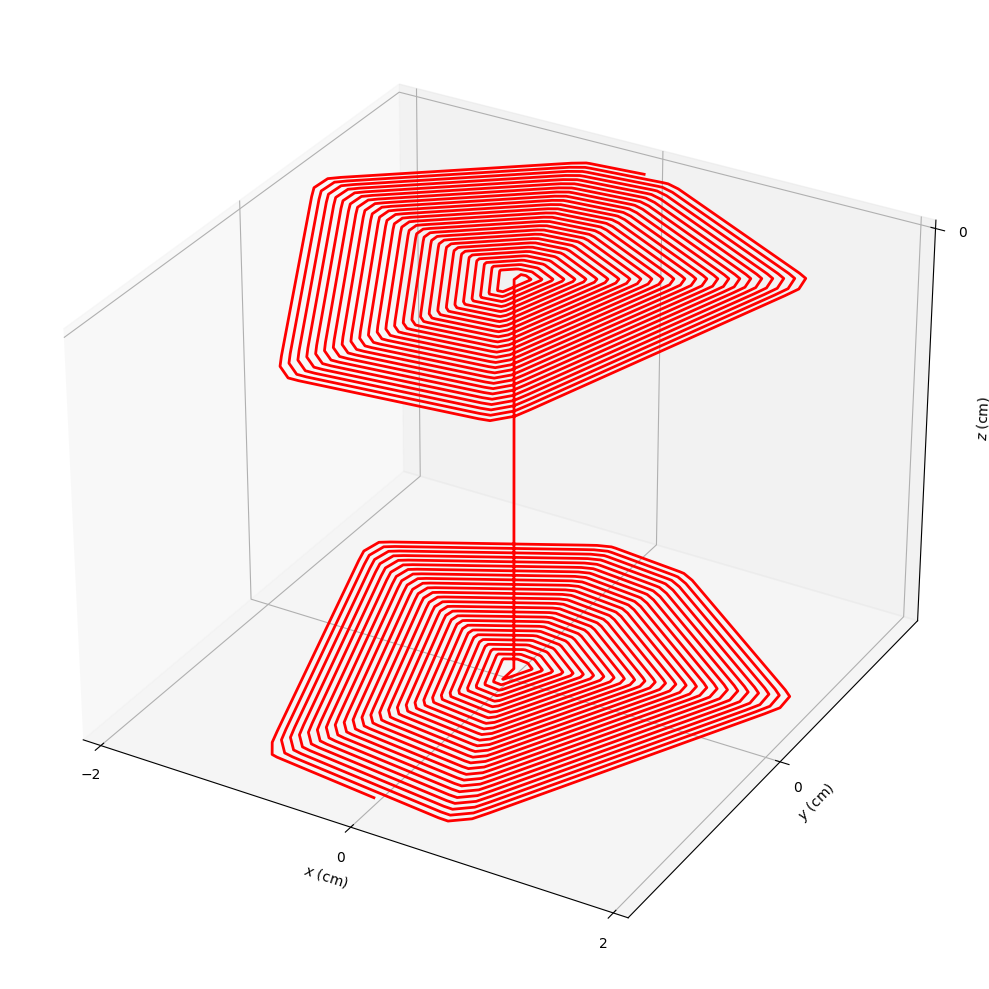

In [17]:
bs.plot_coil(COIL)

In [18]:
bs.write_target_volume(
    COIL,
    COIL_NAME + "volume.vol",
    (4, 4, 4),
    (-2, -2, -2),
    0.1,
    0.1,
)

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
21


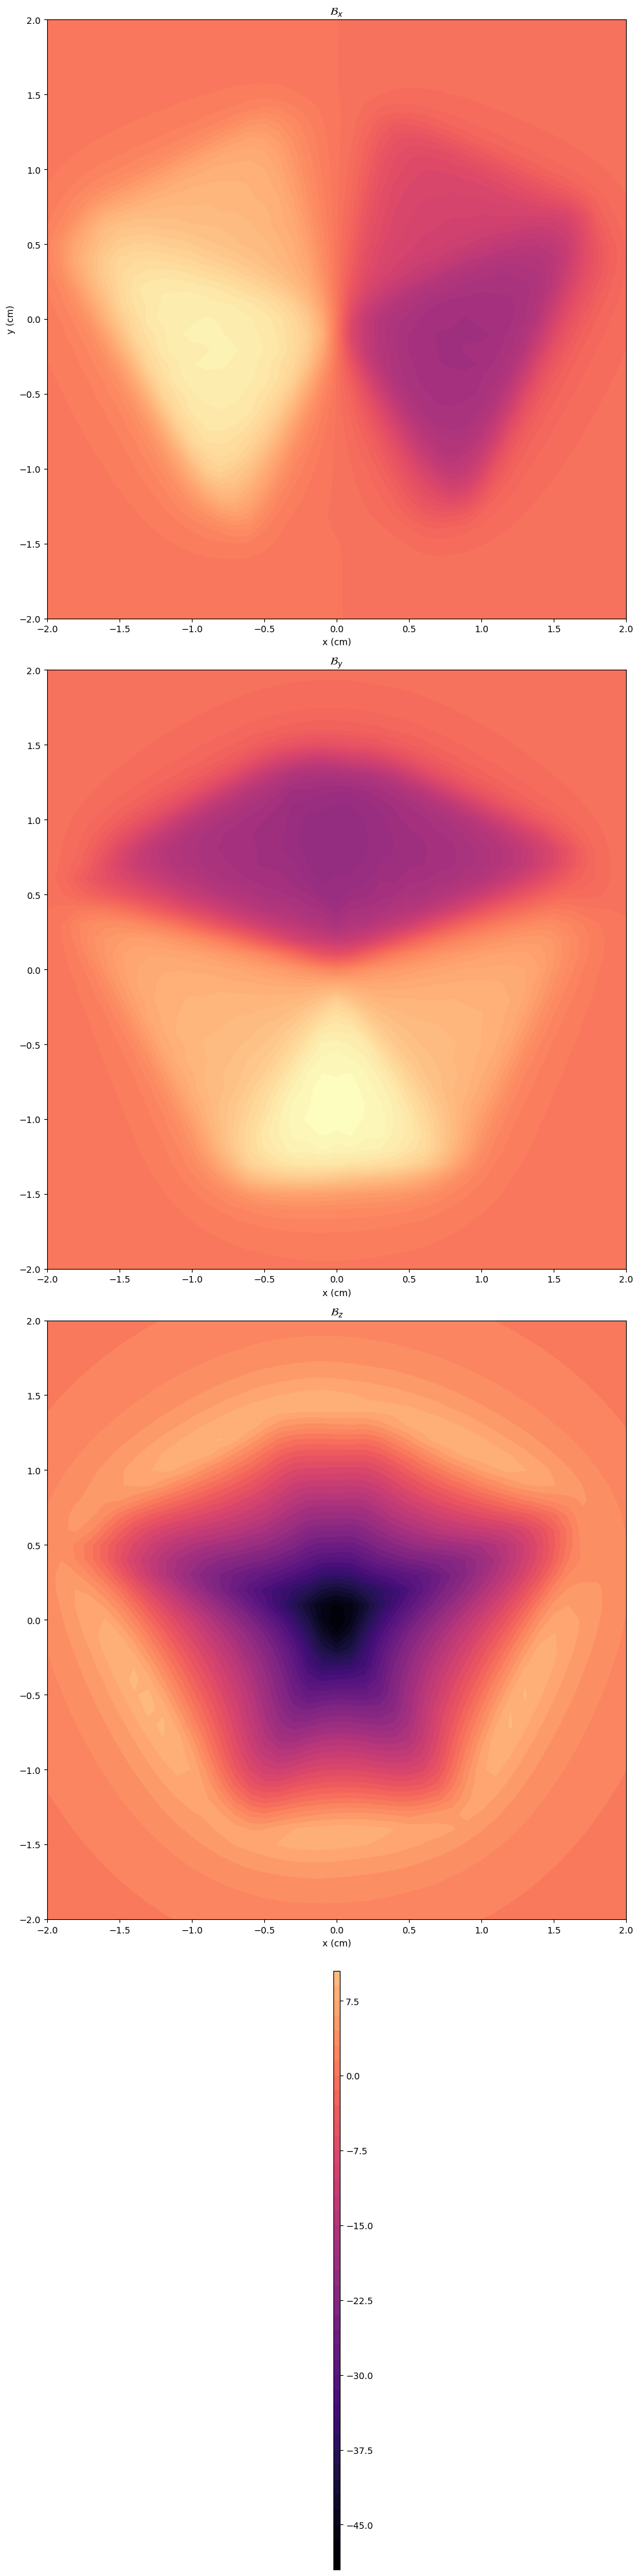

<module 'matplotlib.pyplot' from '/home/jaine/Axial-Flux-Switch-Reluctance-Motor-AFSRM-/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [19]:
# read in the results
total_volume = bs.read_target_volume(COIL_NAME + "volume.vol")

total_volume = -total_volume

# reads the volume we created
bs.plot_fields(total_volume, (4, 4, 4), (-2, -2, -2), 0.1, which_plane="z", level=0.1)

In [20]:
import plotly.graph_objects as go

X, Y, Z = np.mgrid[-2:2:41j, -2:2:41j, -2:2:41j]
# values = np.sqrt(total_volume[:,:,:,0]*total_volume[:,:,:,0] +
# total_volume[:,:,:,1]*total_volume[:,:,:,1] +
# total_volume[:,:,:,2]*total_volume[:,:,:,2])
values = total_volume[:, :, :, 2]
fig = go.Figure(
    data=go.Volume(
        x=X.flatten(),
        y=Y.flatten(),
        z=Z.flatten(),
        value=np.abs(values.flatten()),
        isomin=0.1,
        isomax=0.5,
        opacity=0.1,  # needs to be small to see through all surfaces
        surface_count=17,  # needs to be a large number for good volume rendering
    )
)

coil = bs.parse_coil("coils/" + COIL_NAME + ".csv")
coil = coil[0:3, :]
# add the coil as a line plot
fig.add_trace(
    go.Scatter3d(
        x=coil[0, :],
        y=coil[1, :],
        z=coil[2, :],
        mode="lines",
        line=dict(color="red", width=5),
    )
)
# make the plotly graph bigger
fig.update_layout(
    autosize=False,
    width=1400,
    height=1000,
)
fig.show()

(41, 41)
(41, 41)
(41, 41)


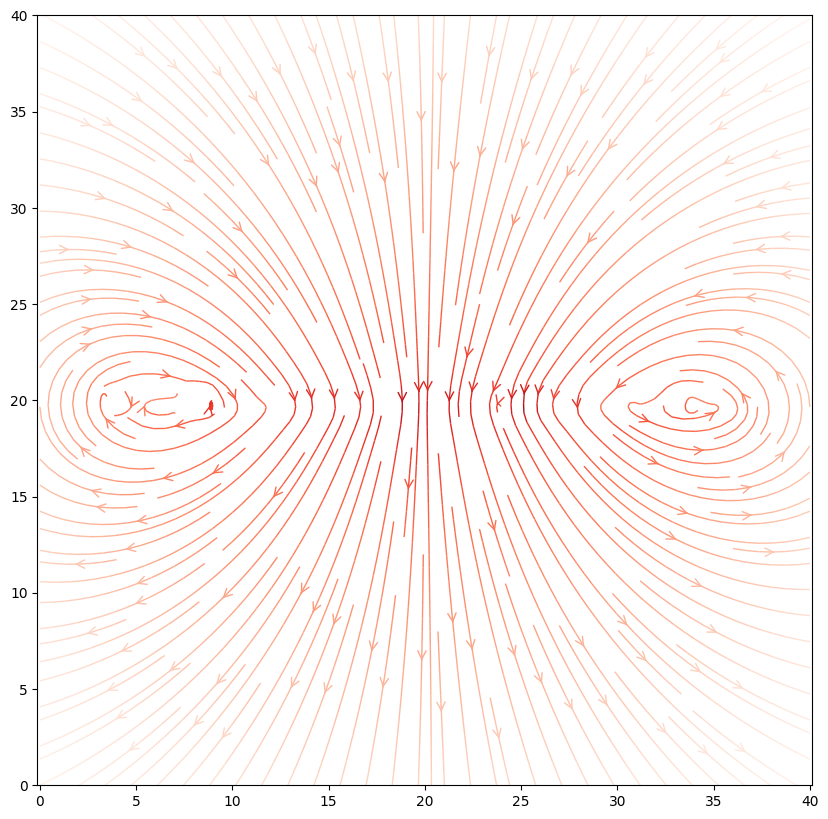

In [21]:
slice = [total_volume[:, 21, :, i].T for i in range(3)]
x_contour = slice[0]
y_contour = slice[1]
z_contour = slice[2]

print(x_contour.shape)
print(y_contour.shape)
print(z_contour.shape)

x = np.arange(0, x_contour.shape[0], 1)
y = np.arange(0, z_contour.shape[1], 1)
xG, yG = np.meshgrid(x, y)

# calclulate the magnitude of the field
mag = np.sqrt(x_contour ** 2 + y_contour ** 2 + z_contour ** 2)

# color = 2 * np.log(np.hypot(x_contour, z_contour))
color = np.log(mag)
stream_plot = plt.streamplot(
    x,
    y,
    x_contour,
    z_contour,
    color=color,
    linewidth=1,
    cmap=plt.cm.Reds,
    density=2,
    arrowstyle="->",
    arrowsize=1.5,
)
# set the axis to be equal
plt.axis("equal")

# set the plt size to 5x5
plt.rcParams["figure.figsize"] = (10, 10)

# save the figure
plt.savefig(COIL_NAME + "_field_lines.png")

-48.31542090947008 9.46222215430214
top Z:  -8301.610393860217
bottom Z:  4185.610467851475
-48.31542090947008 9.46222215430214


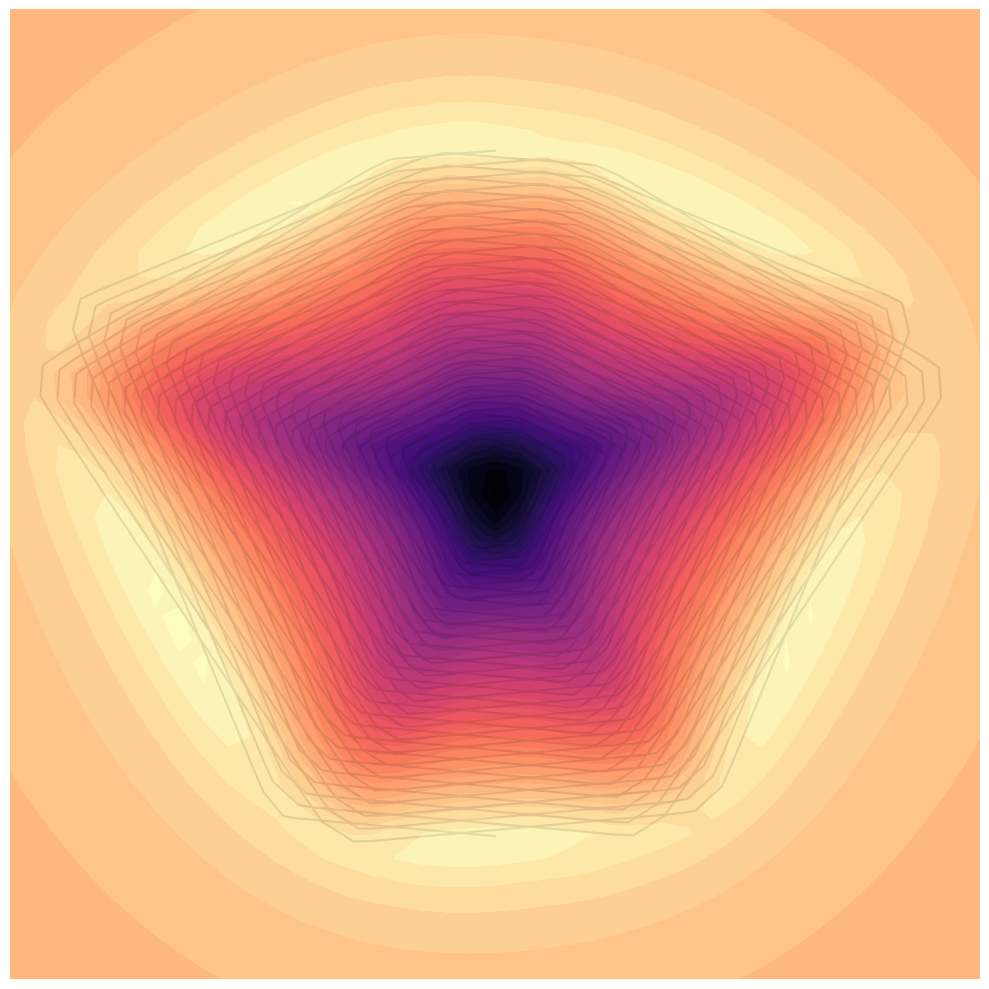

In [22]:
import matplotlib.cm as cm

# get the total left and right field in the X direction
slice = [total_volume[:, :, 21, i].T for i in range(3)]
x_contour = slice[0]
y_contour = slice[1]
z_contour = slice[2]

# vmin = np.min([np.min(x_contour), np.min(z_contour), np.min(y_contour)])
# vmax = np.max([np.max(x_contour), np.max(z_contour), np.max(y_contour)])

vmin = np.min(z_contour)
vmax = np.max(z_contour)

# -7.970943527635176 7.775784181783158
#vmin = -7.970943527635176
#vmax = 7.775784181783158

print(vmin, vmax)

#left_x = np.sum(x_contour[x_contour < 0])
#right_x = np.sum(x_contour[x_contour > 0])

top_z = np.sum(z_contour[z_contour < 0])
bot_z = np.sum(z_contour[z_contour > 0])

#print("Left X: ", left_x)
#print("Right X: ", right_x)

print("top Z: ", top_z)
print("bottom Z: ", bot_z)

plt.rcParams["figure.figsize"] = (5, 5)

# make the plot larger
plt.rcParams["figure.figsize"] = (10, 10)

# plot the coil
coil = bs.parse_coil("coils/" + COIL_NAME + ".csv")
coil = coil[0:3, :]
coil = coil * 10 + 20
plt.plot(coil[0, :], coil[1, :], color="black", alpha=0.1)

# plt.imshow(x_contour, cmap='hot', interpolation='nearest')
plt.contourf(
    z_contour,
    vmin=vmin,
    vmax=vmax,
    cmap=cm.magma,
    levels=50,
)

# hide the axis
plt.axis("off")

# remove any padding
plt.tight_layout()
plt.margins(x=0)
plt.margins(x=0)

plt.savefig(COIL_NAME + "_field_y.png", bbox_inches="tight", pad_inches=0)

print(vmin, vmax)

# 6 coil custom
# Left X:  -565.6790142743889
# Right X:  544.1011578804321

# 6 coil spiral
# Left X:  -512.1107132193335
# Right X:  534.1946450523811

# 12 coil spiral
# Left X:  -218.54696343677543
# Right X:  233.84835661493196

# 12 coil custom
# Left X:  -361.95894587646944
# Right X:  347.13174239269904

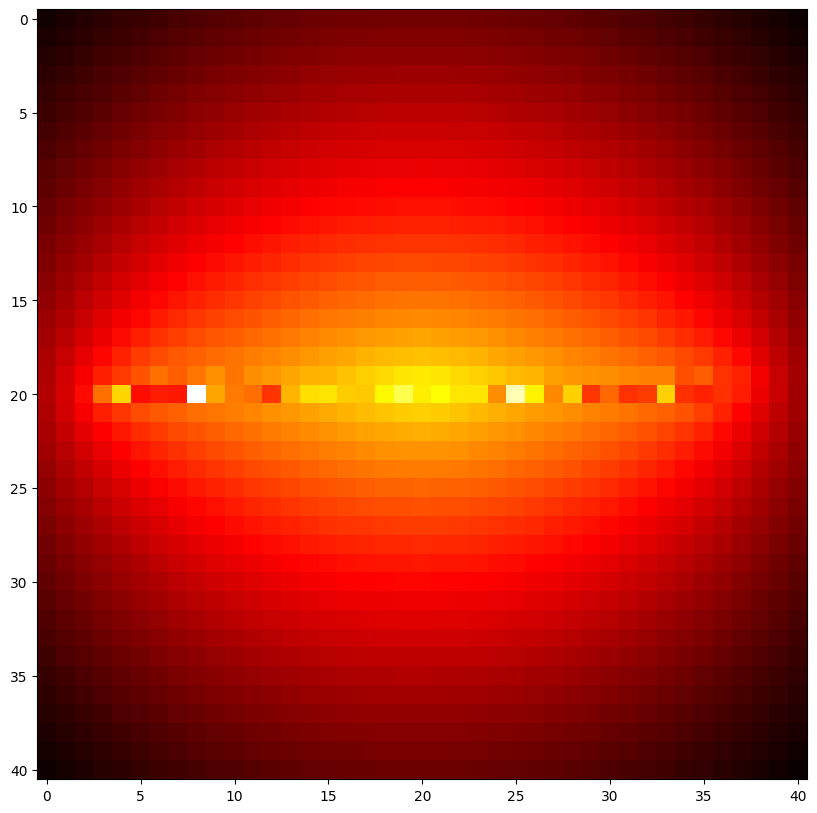

In [23]:
# plot the magitude of the slice
plt.imshow(np.log(mag), cmap="hot", interpolation="nearest")

18.801325119105712 0.6413769033374179


(array([  32.,   36.,   45.,   55.,   62.,   75.,   84.,   97.,  158.,
        1037.]),
 array([-18.79565457, -16.76391132, -14.73216807, -12.70042482,
        -10.66868156,  -8.63693831,  -6.60519506,  -4.57345181,
         -2.54170856,  -0.50996531,   1.52177794]),
 <BarContainer object of 10 artists>)

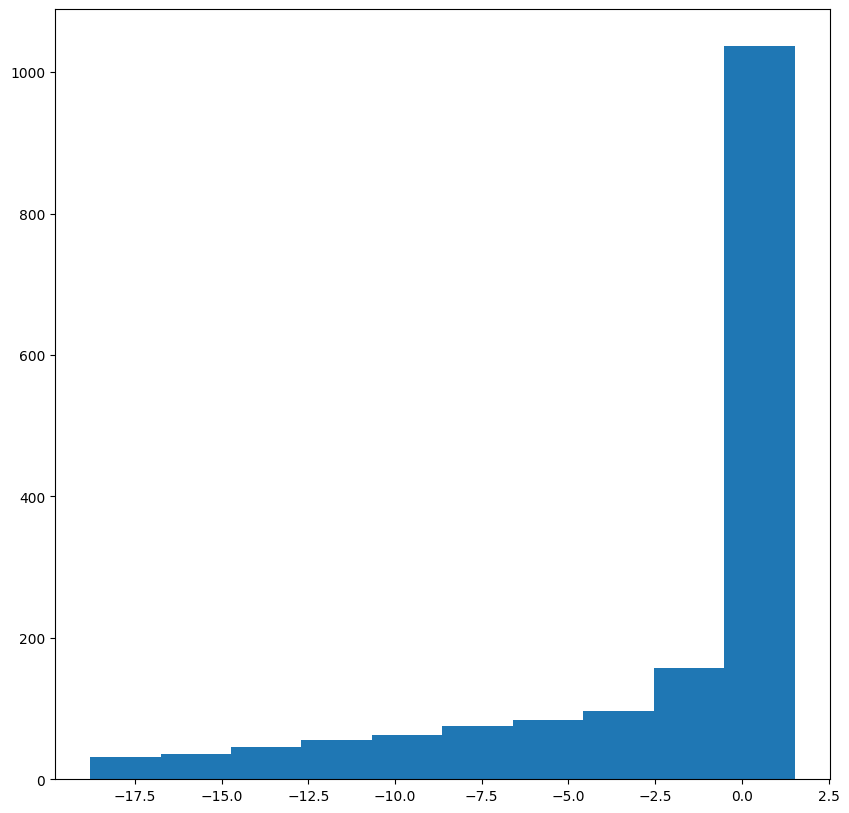

In [24]:
slice = [total_volume[:, :, 25, i].T for i in range(3)]
x_contour = slice[0]
y_contour = slice[1]
z_contour = slice[2]

mag = np.sqrt(x_contour ** 2 + y_contour ** 2 + z_contour ** 2)

print(np.max(mag), np.min(mag))

# plot a histogram of the magnitude
# plt.hist(mag.flatten(), bins=10)

plt.hist(z_contour.flatten(), bins=10)

(41, 41) (41, 41) (41, 41)


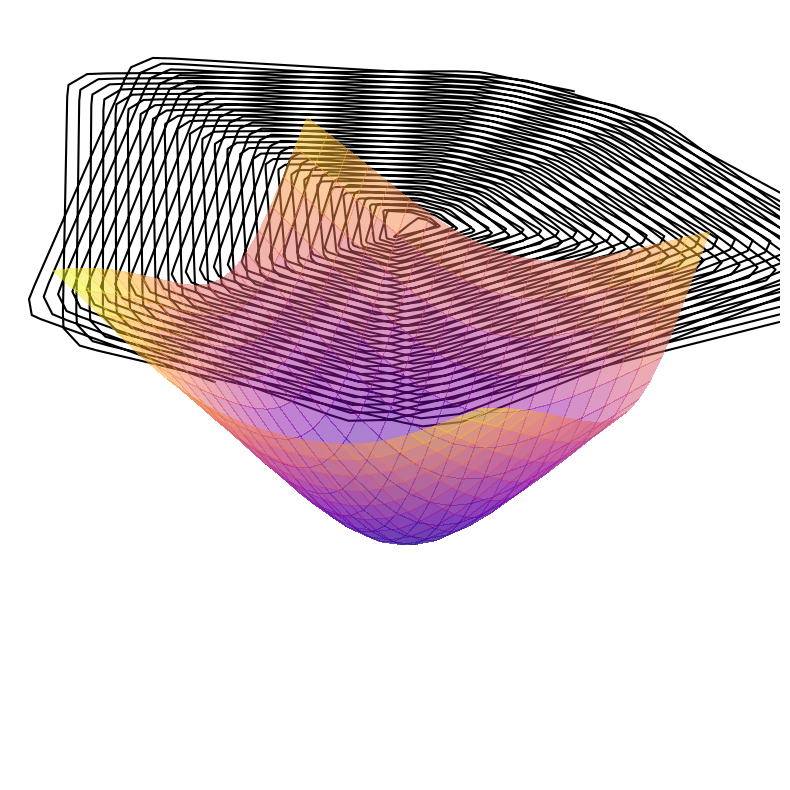

In [25]:
# show the z contour as a 3d surface plot
fig = plt.figure()

# change the figure size to 16.9
ax = fig.add_subplot(111, projection="3d")

xG_ = xG[10:30, 10:30]
yG_ = yG[10:30, 10:30]
z_contour_ = z_contour[10:30, 10:30]

print(xG.shape, yG.shape, z_contour.shape)

# change the axis limits to 10 to 30
ax.set_xlim(10, 30)
ax.set_ylim(10, 30)
surf = ax.plot_surface(
    xG_, yG_, z_contour_, cmap=cm.plasma, linewidth=0, antialiased=False, alpha=0.5
)
# add the coil to the plot as a set of lines - the X and Y coordinates of the coil are in the first two elements of the coil array
coil = bs.parse_coil("coils/" + COIL_NAME + ".csv")
coil = coil[0:2, :]
# need to scale the coil by 10 and shift it by 20, 20
coil = coil * 10 + 20
# draw the coil in yellow
ax.plot(coil[0, :], coil[1, :], 0, color="black")

# hide the axes
ax.set_axis_off()

# save to png
plt.savefig(COIL_NAME + "_field_surface_z.png")
plt.show()

In [26]:
# write out the coil as SVG
coil = bs.parse_coil("coils/" + COIL_NAME + ".csv")
coil = coil[0:2, :]
with open(COIL_NAME + "_coil.svg", "w") as f:
    # write the header
    f.write('<svg viewBox="0 0 400 400" xmlns="http://www.w3.org/2000/svg">')
    # the X and Y points of the coil the X and Y coordinates of the coil are in the first two elements of the coil array
    # write out the coil as a set of lines
    print(len(coil[0]) - 1)
    # write out the coil as a polyline
    f.write('<polyline points="')
    for i in range(0, len(coil[0]), 10):
        f.write(str(coil[0, i] * 100 + 200) + "," + str(coil[1, i] * 100 + 200) + " ")
    f.write('" style="fill:none;stroke:black;stroke-width:1" />')
    # write the footer
    f.write("</svg>")

1259
